In this notebook, we examine why gamma correction is a reasonable thing to do to enhance the cracks. We begin by understanding the expression mathematically, before experimenting with its effects on images of cracked panels.

In [29]:
from matplotlib import pyplot as plt
from scipy.misc import imread
from glob import glob
import numpy as np
import skimage

%matplotlib inline

#### Motivation

An attribute common to all cracks is the intensity of their pixels. Cracks appear as very dark wiggly lines in our images. Unfortunately, non-crack debris also manifests itself in the images as dark pixels. This can make it difficult to differentiate a crack from its background. To improve our ability to do so, we might choose to exploit the fact that cracks are usually slightly darker than scuffs, dead cells and other detritus: We could enhance the contrast between dark image artifacts.

#### Method

In this context, we are interested in enhancing contrast in a particular region of the intensity spectrum. Gamma correction allows us to do exactly this - we can increase the distance between darkly-coloured elements, at the expense of reducing contrast in lighter regions (a side-effect of no real consequence here).

Gamma correction consists of taking some power of an image's pixel intensities. By choosing an appropriate exponent, we can enhance contrast in the intensity region we are interested in.

$$
    I_{out} = a I_{in}^{\gamma}
$$

Where $I_{in}$ denotes the input image tensor of intensity values, $a$ is a scalar hyperparameter that allows us to occupy the entire intensity scale, and $\gamma$ is another scalar that determines the degree of expansion/compression in the dark/light regions of the intensity spectrum.

Conveniently, this function is differentiable - an attribute that will come in handy later.

In [13]:
def correct_gamma(i, gamma, a=1):
    return 255 * (i**gamma) / np.max(i**gamma)

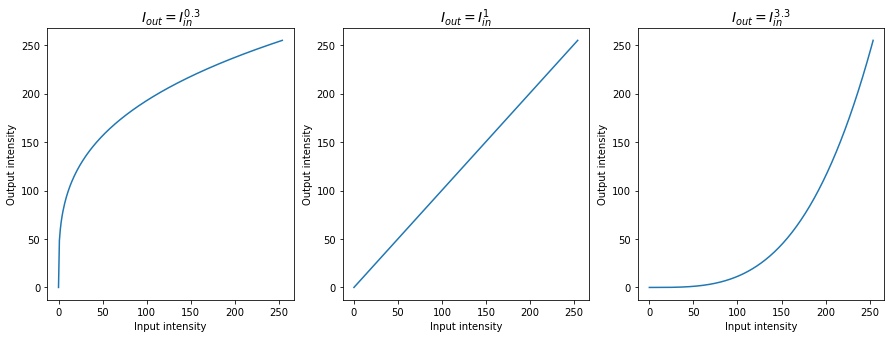

In [26]:
intensities = np.arange(0, 255, 1)
gamma = [0.3, 1, 1/0.3]

f, axs = plt.subplots(1, 3, figsize = (15, 5))

for g, ax in zip(gamma, axs):
    ax.plot(intensities, correct_gamma(intensities, g))
    ax.set_xlabel('Input intensity')
    ax.set_ylabel('Output intensity')
    ax.set_title('$I_{out} = I_{in}^{' + str(g)[:3] + '}$', fontsize = 14)

Note that the gain, $a$, in these images was configured automatically such that the output occupied the entirety of $[0, 255]$.

#### Results

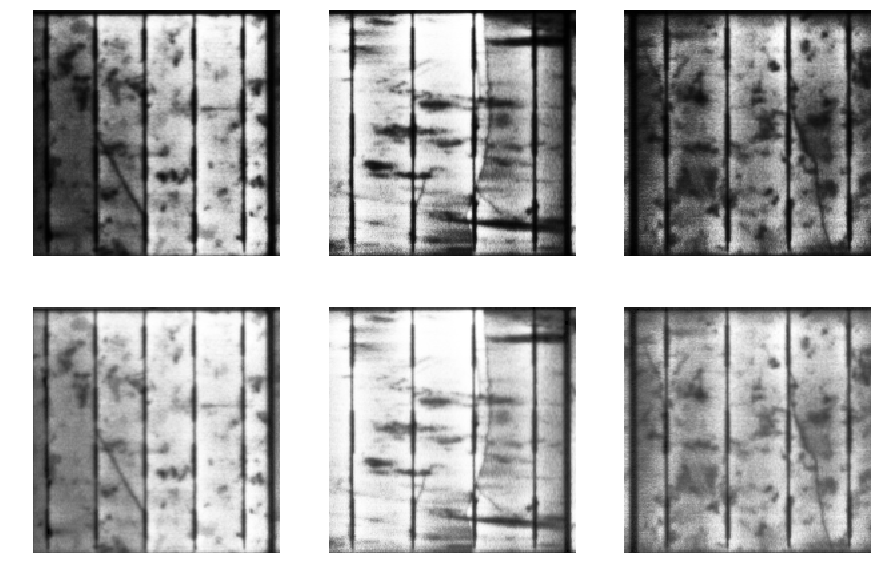

In [44]:
image_filepaths = glob('./Data/170729_Panel_Solos_Resized/Cracked/*.png')
SAMPLE_SIZE     = 3
GAMMA           = 0.5
image_filepaths = np.random.choice(image_filepaths, SAMPLE_SIZE)

f, axs = plt.subplots(2, SAMPLE_SIZE, figsize = (15, 10))
axs = axs.flatten()

for i, fp in enumerate(image_filepaths):
    axs[i].imshow(imread(fp), cmap = 'gray')
    axs[i].axis('off')
    axs[i + SAMPLE_SIZE].imshow(correct_gamma(imread(fp), GAMMA),
                             cmap = 'gray')
    axs[i + SAMPLE_SIZE].axis('off');

As we can see, gamma correction enhances contrast in an image's darkest regions. Consequently, cracks are more easily resolved from their surroundings.